# Data visualization

In [1]:
# loading data
import pandas as pd
import os
import matplotlib.pyplot as plt
def load_housing_data(housing_path=os.path.join("../datasets", "housing")):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [2]:
# housing dataset
housing = load_housing_data()
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


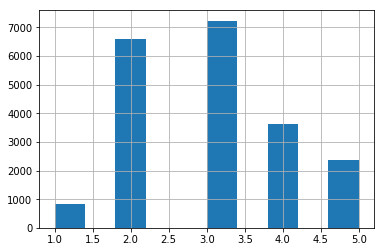

In [3]:
# imcome_category
import numpy as np
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [4]:
# stratified train test split
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, train_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [5]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

In [6]:
# removing the income_cat attribute
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [7]:
# making a copy of train set
housing = strat_train_set.copy()

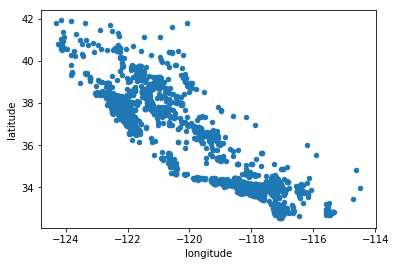

In [8]:
# scatter plot
housing.plot(kind="scatter", x="longitude", y="latitude")

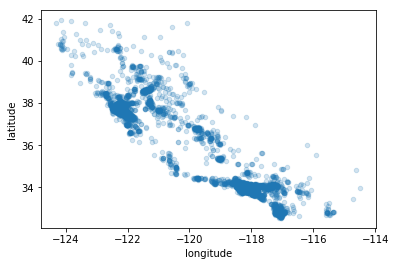

In [9]:
# scatter plot with transcparency
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)

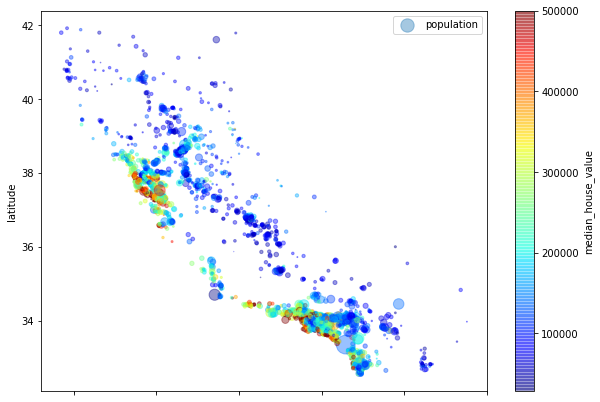

In [10]:

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [11]:
# correlation
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.692069
total_rooms           0.127966
housing_median_age    0.122159
households            0.058929
total_bedrooms        0.040350
population           -0.030176
longitude            -0.067252
latitude             -0.129829
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2db3981b10>,
      dtype=object)

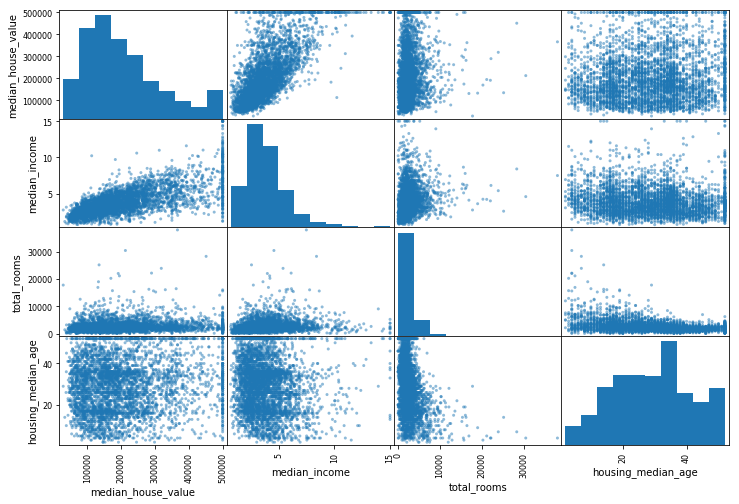

In [12]:
# graphing correlating features
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
             "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

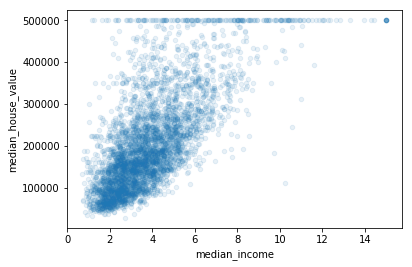

In [13]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [14]:
# mxing attributes for more hidden information
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [15]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.692069
total_rooms                 0.127966
housing_median_age          0.122159
rooms_per_household         0.112054
households                  0.058929
total_bedrooms              0.040350
population                 -0.030176
longitude                  -0.067252
latitude                   -0.129829
population_per_household   -0.176390
bedrooms_per_room          -0.275329
Name: median_house_value, dtype: float64